In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
import hashlib
import numpy as np
from matplotlib import rc
from ProjectAnalysis import ProjectAnalysis

In [2]:
common_errors = [
    'error: unmappable character for encoding ASCII',
    'error: incompatible types',
    'error: cannot find symbol',
    'Invalid byte tag in constant pool',
    "A problem occurred evaluating root project",
    'Cannot allocate memory',
    'Could not determine which tasks to execute',
    'error: (.+)\n(.+)',
    'The import (.+) cannot be resolved',
    '(> Could not resolve|> Could not find) (.+)',
    'Exception in thread (.+)',
    'A problem occurred evaluating (.*)(\n)?(.*) (does not exist)?',
    'Execution failed for task (.*)',
    'gradlew: No such file or directory',
    'Could not find method (.*)'
]
pa = ProjectAnalysis("spring-framework",  1)

In [3]:
pa.df().head()

,id,commit,build,exec_time,comment,fix,lastFix
0,0,d303c8a,SUCCESS,44,Store PathPattern instead of String in attributes,{},NaN
1,1,ab8310b,SUCCESS,45,Fix HeadersAdapters implementations,{},NaN
2,2,fdaceeb,SUCCESS,44,Remove checks and updates to transfer-encoding,{},NaN
3,3,2c5a1af,SUCCESS,44,Leverage Java reflection for Kotlin enums,{},NaN
4,4,f885910,SUCCESS,44,Remove unused bom import too,{},NaN


## Calculate the number of builds of each type

In [4]:
pa.df()[(pa.df()['build'] == 'SUCCESS')].count()

id           6013
commit       6013
build        6013
exec_time    6013
comment      6013
fix          6013
lastFix         0
dtype: int64

In [5]:
pa.df()[(pa.df()['build'] == 'FAIL')].count()

id           11070
commit       11070
build        11070
exec_time    11070
comment      11059
fix          11070
lastFix          0
dtype: int64

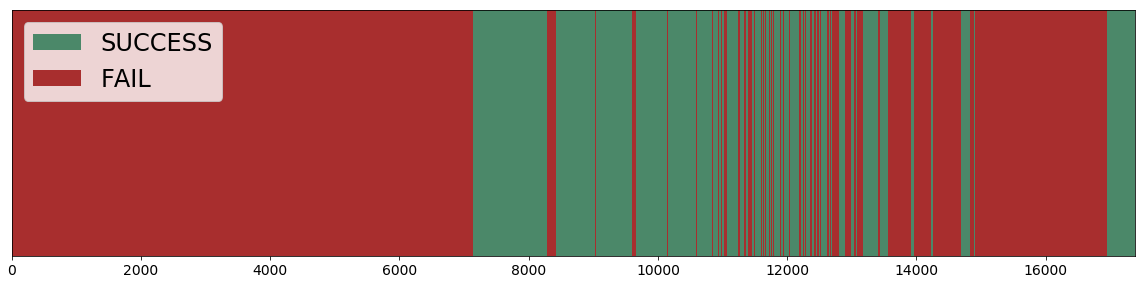

In [6]:
pa.plot_and_save_histogram(1)

## We collect all the fails, separate them in groups and obtain the logs of each commit for failed builds

In [8]:
fails, groups_of_fails = pa.get_fails_and_grouped_fails()

In [9]:
errors = pa.group_errors_by_log(fails, common_errors)

In [10]:
df = pd.DataFrame.from_dict(errors, orient='index')
df=df.groupby(['key','trace']).agg({'count': 'sum'}).sort_values(by=['count'], ascending=False)
df.to_csv("%s_errors.csv"%pa.project, sep='\t', encoding='utf-8')
df

,,count
key,trace,
ccdb01712ea99a72ad11e3dc5e165303,gradlew: No such file or directory,5633
235a844d63971a9fbf3bf17fd4c18fe2,Cannot allocate memory,2353
0b3e868b173ef8c4425a4c4bfe798457,Invalid byte tag in constant pool,470
5b15d268dc71a83ef2deca0f11844141,"> Could not find group:com.itextpdf, module:itextpdf, version:4.2.2.",460
544ccf6f925572feae9fa33bde8ce412,The import java.util.Arrays cannot be resolved,398
fa412f159617fae287c1468a983063ad,error: warnings found and -Werror specified 1 error,328
66eb9f223332d42c2ae312408c746f11,error: cannot find symbol,218
013cd96f4a6beca89ce501e1c3389fe0,error: incompatible types,210
6742305c4ac74d1bd97839f73f2b73b0,Could not determine which tasks to execute,206


In [13]:
pa.view_log_by_hash(errors,'4d1212a03c1daaff663c9c2704c1c694', 0)

Total commits: 1 | Current commit: 17525ef | Log: 

Exception in thread "DisconnectableInputStream source reader" org.gradle.api.UncheckedIOException: java.io.IOException: Bad file descriptor
	at org.gradle.internal.UncheckedException.throwAsUncheckedException(UncheckedException.java:43)
	at org.gradle.util.DisconnectableInputStream$1.run(DisconnectableInputStream.java:125)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: Bad file descriptor
	at java.io.FileInputStream.readBytes(Native Method)
	at java.io.FileInputStream.read(FileInputStream.java:255)
	at java.io.BufferedInputStream.fill(BufferedInputStream.java:246)
	at java.io.BufferedInputStream.read1(BufferedInputStream.java:286)
	at java.io.BufferedInputStream.read(BufferedInputStream.java:345)
	at org.gradle.util.DisconnectableInputStream$1.run(DisconnectableInputStream.java:96)
	... 1 more
:buildSrc:compileJava UP-TO-DATE
:buildSrc:compileGroovy
:buildSrc:processResources
:buildSrc:classes
:buildSrc:jar


In [14]:
pa.save_success_commits()

Saved at '../spring-framework/experiment_1/success_commits.txt'
